# TSPモジュールのインポート

In [1]:
import TSP

# help()で、使えるメソッドの名前とその引数などを確認

In [2]:
help(TSP)

Help on module TSP:

NAME
    TSP - solve Traveling Salesman Problem.

FUNCTIONS
    NN(...) method of builtins.PyCapsule instance
        NN(arg0: int, arg1: List[int], arg2: List[Tuple[float, float]]) -> List[int]
        
        A function which solve TSP by NN algorithm.

FILE
    /Users/okamoto/Desktop/Opt/TSP/TSP.cpython-37m-darwin.so




# 問題例の作成
適当な画像を点描画化し、それらの点をつなぎ合わせる

In [4]:
import cv2
import os
import numpy as np
import random

img = cv2.imread("mucha.png",cv2.IMREAD_COLOR)
#print(img[150, 30])
#print(len(img))
#print(len(img[1]))

C={}
demand={}
c_counter=0
#写真の座標を見て、黒だったら顧客リストに座標追加
for i in range(len(img)):
    for j in range(len(img[0])):
        iro = sum(list(img[i,j])) 
        r=random.randint(0,iro) 
        if iro==0:
            r=random.randint(0,1) #1/20の確率で顧客ノード追加
        if r==0:
            C["c"+str(c_counter)] = (i,j)
            demand["c"+str(c_counter)]=1
            c_counter += 1
C["depot"] = C["c"+str(len(C)-1)]
print("点数",len(C))

点数 129163


In [5]:
# 距離関数を定義
def distance(t1,t2):
    return ((t1[0]-t2[0])**2+(t1[1]-t2[1])**2)**(0.5)

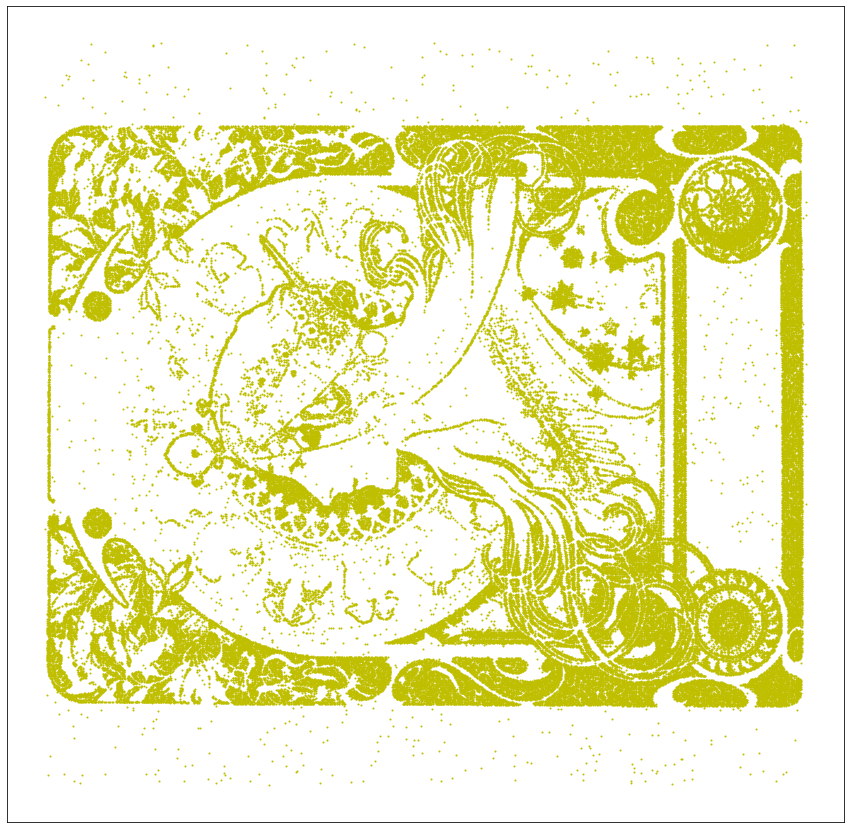

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,15))

G=nx.DiGraph()
nx.draw_networkx(G,pos=C,nodelist=[i for i in C if i != "depot"],node_color="y",node_size=1,with_labels=True,edge_color="k",width=1)

# 描画
plt.show()

# 求解

In [8]:
import time
# 実行時間計測スタート
start = time.time()

tsp_list_c=TSP.NN(len(C),[i for i in range(len(C))],list(C.values()))
tsp_list_c = list(map(lambda x:'c'+str(x),tsp_list_c))

# 実行時間計測ストップ
elapsed_time = time.time() - start

print ("求解にかかった時間は", elapsed_time, "s")

求解にかかった時間は 24.877602100372314 ms


# 得られた巡回路を描画して確認

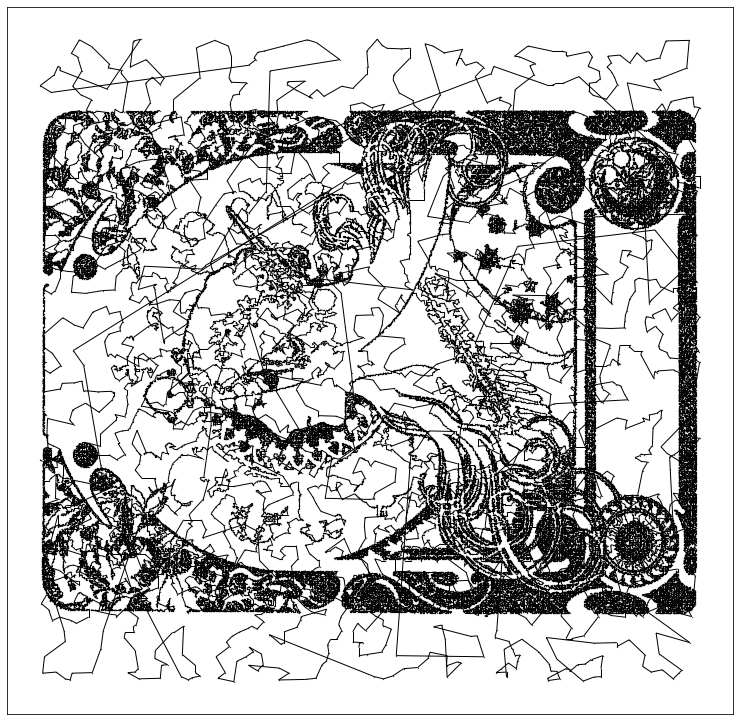

In [9]:
import networkx as nx

G = nx.Graph()
for i in C:
    G.add_node(i)
edge_list=[]
for i in range(len(tsp_list_c)-1):
    if tsp_list_c[i]=='c'+str(len(tsp_list_c)-1):
        edge_list.append(("depot",tsp_list_c[i+1]))
    elif tsp_list_c[i+1]=='c'+str(len(tsp_list_c)-1):
        edge_list.append((tsp_list_c[i],"depot"))
    else:
        edge_list.append((tsp_list_c[i],tsp_list_c[i+1]))
G.add_edges_from(edge_list)

fig=plt.figure(figsize=(13,13 ))
nx.draw_networkx(G,pos=C,nodelist=C,node_color='black',node_size=0.1,with_labels=False,edge_color="k",width=1)
plt.show()